#### Probabilistic Clustering with Gaussian Mixture Models 

###### In `K-Means` we assume that variance of the clusters is equal, however, in the cases were variances vary, `GMM` can be used

In [1]:
#Simple Example using simulation of heights of both women and men 

import numpy as np 
N = 1000
m_height_men = 72 #Mean height of men
m_height_women = 66 #mean height of women
std_men = 2 #standard deviation of men height
std_women = 2 #standard deviation of women height

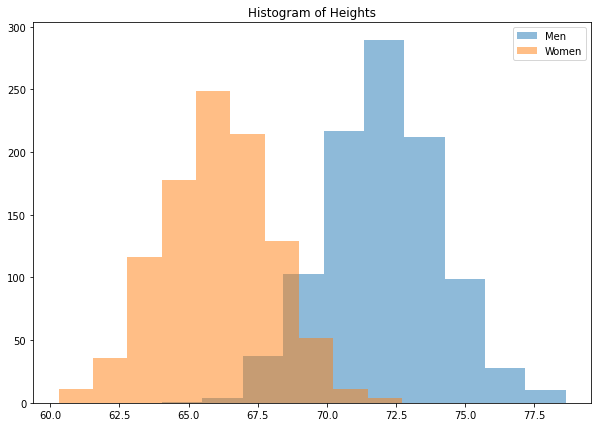

In [2]:
men = np.random.normal(m_height_men, std_men, N)
women = np.random.normal(m_height_women, std_women, N)

import matplotlib.pyplot as plt
%matplotlib inline 

fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("Histogram of Heights")
ax.hist(men, alpha=0.5, label="Men")
ax.hist(women, alpha=0.5, label="Women")
ax.legend()

In [3]:
#Creating test and train samples 

random_samples = np.random.choice([True, False],size=men.size)
men_test = men[random_samples]
men_train = men[~random_samples]
women_test = women[random_samples]
women_train = women[~random_samples]

In [4]:
#Getting empirical distribution of the heights of both men and women 

from scipy import stats 
men_pdf = stats.norm(men_train.mean(),men_train.std())
women_pdf = stats.norm(women_train.mean(), women_train.std())

In [5]:
#Next, we will calculate based on the likelihood that the data point was generated from either distribution, and the most likely distribution will get the appropriate label assigned 

men_pdf.pdf(men[0])

0.033085369053765426

In [6]:
women_pdf.pdf(women[0])

0.19033782241577527

In [7]:
#Lets assume situations when the men's probability is higher 

guess_men = np.ones_like(men_test)
guess_men[men_pdf.pdf(men_test) < women_pdf.pdf(men_test)] = 0

In [8]:
#guees_men will be 1 if we are correct, and close to 0 if we are not, taking the mean of the vector and get the accuracy 
guess_men.mean()

0.9342915811088296

In [9]:
guess_women = np.ones_like(women_test)
guess_women[women_pdf.pdf(women_test) > women_pdf.pdf(women_test)] = 0 
guess_women.mean()

1.0

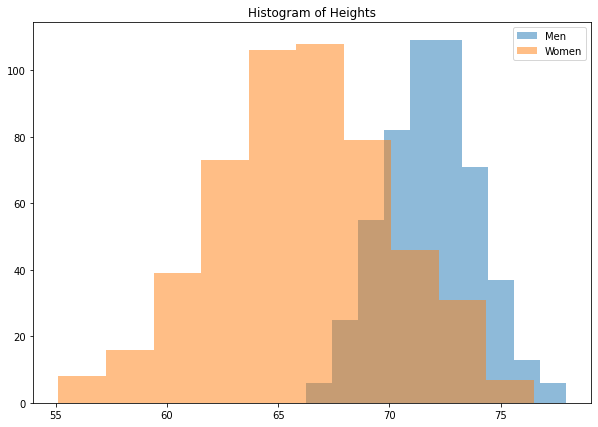

In [11]:
#If we allow the variance to differ between groups 

std_men = 2 
std_women = 4

men = np.random.normal(m_height_men, std_men, N)
women = np.random.normal(m_height_women, std_women, N)



men_test = men[random_samples]
men_train = men[~random_samples]
women_test = women[random_samples]
women_train = women[~random_samples]

fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("Histogram of Heights")
ax.hist(men_train, alpha=0.5, label="Men")
ax.hist(women_train, alpha=0.5, label="Women")
ax.legend()

In [12]:
#CREATING PDF

men_pdf = stats.norm(men_train.mean(), men_train.std())
women_pdf = stats.norm(women_train.mean(), women_train.std())


C:\Users\konar\AppData\Local\Temp\ipykernel_13388\1629018551.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, men_pdf.pdf(x), 'k',linewidth=2, color='blue',label='Men')
C:\Users\konar\AppData\Local\Temp\ipykernel_13388\1629018551.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, women_pdf.pdf(x),'k', linewidth=2, color='green',label='Women')


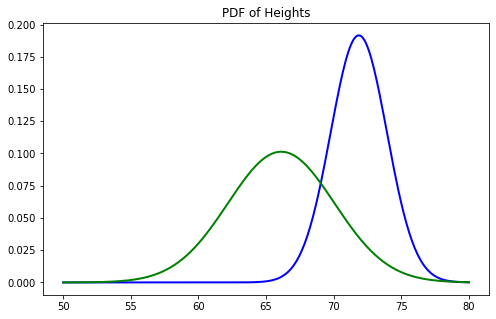

In [13]:
x = np.linspace(50,80,300)
plt.figure(figsize=(8,5))
plt.title("PDF of Heights")
plt.plot(x, men_pdf.pdf(x), 'k',linewidth=2, color='blue',label='Men')
plt.plot(x, women_pdf.pdf(x),'k', linewidth=2, color='green',label='Women')



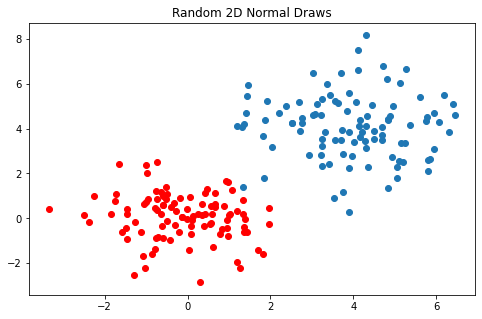

In [15]:
class_A = np.random.normal(0,1,size=(100,2))
class_B = np.random.normal(4, 1.5, size=(100,2))

fig, ax = plt.subplots(figsize=(8,5))
plt.title("Random 2D Normal Draws")
ax.scatter(class_A[:,0],class_A[:,1],label='A',c='r')
ax.scatter(class_B[:,0],class_B[:,1],label='B')

##### Let's do `GMM` with scikit now

In [17]:
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture()

X = np.row_stack((class_A, class_B))
y = np.hstack((np.ones(100), np.zeros(100)))


train = np.random.choice([True, False],200)
gmm.fit(X[train])
gmm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 1,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [18]:
gmm.predict(X[train])[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [19]:
X[train][:5]

array([[ 0.09858459, -0.09169468],
       [-1.65217131,  2.41911118],
       [-0.5897825 ,  1.00045122],
       [ 0.25167112,  0.17502491],
       [ 0.87847771,  0.56666034]])